In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:

# Get theconda create --name talib python=3.9 current working directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)



c:\Users\HP\Documents\10-Academy\Nova-Financial-Solution-WEEK1\notebooks
c:\Users\HP\Documents\10-Academy\Nova-Financial-Solution-WEEK1


In [5]:
from scripts.EDA_analysis import EDAAnalysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Load the CSV file into a DataFrame
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Initialize the EDAAnalysis class
eda = EDAAnalysis(df)

## Descriptive Statistics:

In [5]:
# Obtain basic statistics for textual lengths
length_stats = eda.descriptive_statistics()
print("Headline Length Statistics:", length_stats)

Headline Length Statistics: {'mean_length': 73.12051490484095, 'median_length': 64.0, 'max_length': 512, 'min_length': 3}


The dataset reveals that the average headline length is about 73 characters, with most headlines being around 64 characters. This suggests that the headlines are generally detailed. However, there is significant variability, as evidenced by a maximum headline length of 512 characters, which is unusually long and likely an outlier, and a minimum of just 3 characters, which might indicate a very concise headline or potential data quality issues. The wide range in headline lengths suggests a diverse approach to headline writing, with some being highly concise and others more verbose, possibly reflecting different editorial styles or content purposes.

In [6]:
# Obtain the number of articles per publisher
publisher_counts = eda.articles_per_publisher()

# Print each publisher and its article count on a new line
print("Number of articles per publisher:")
for publisher, count in publisher_counts.items():
    print(f"{publisher}: {count}")

Number of articles per publisher:
Paul Quintaro: 228373
Lisa Levin: 186979
Benzinga Newsdesk: 150484
Charles Gross: 96732
Monica Gerson: 82380
Eddie Staley: 57254
Hal Lindon: 49047
ETF Professor: 28489
Juan Lopez: 28438
Benzinga Staff: 28114
Vick Meyer: 24826
webmaster: 20313
Benzinga_Newsdesk: 19410
Zacks: 19390
Jayson Derrick: 19050
Allie Wickman: 18317
Shanthi Rexaline: 16640
Craig Jones: 16221
Wayne Duggan: 12897
Nelson Hem: 12590
Dwight Einhorn: 12226
Michael J. Zerinskas: 10892
Joe Young: 10777
Javier Hasse: 8839
David Johnson: 8749
Matthew Kennedy: 8167
Forex Live: 7198
Laura Brodbeck: 7069
Scott Rubin: 6553
Jake L'Ecuyer: 5810
Roger Nachman: 5510
luke@benzinga.com: 5198
Jonathan Chen: 4795
Garrett Cook: 4646
Benzinga Insights: 4371
Benzinga Staff 5: 4068
optionsXpress: 3842
Manikandan Raman: 3837
Elizabeth Balboa: 3804
Benzinga News Desk: 3782
BenzingaStaffJ: 3616
Jim Swanson: 3606
JJ Kinahan: 3583
Benzinga Newsdesk: 3580
John Seward: 3576
FreightWaves: 3543
Matthew Kanterman: 

The dataset reveals significant variability in article production among publishers. Paul Quintaro leads with a substantial 228,373 articles, followed by Lisa Levin with 186,979 and Benzinga Newsdesk with 150,484 articles. The top five publishers, including Charles Gross and Monica Gerson, dominate the output, indicating their major role in content creation. In contrast, several publishers contribute only a few articles, with Laura Jennings, Eric Martin, Jose Rodrigo, and Jeremie Capron each having just one. This distribution highlights a few key contributors versus many with minimal output, illustrating a significant disparity in content production within the dataset.

In [6]:
# Obtain publication trends
publication_trends = eda.publication_trends()

# Print each date and article count on a new line
print("Publication Trends:")
for date, count in publication_trends.items():
    print(f"{date}: {count} articles")

Publication Trends:
2009-02-14: 1 articles
2009-04-27: 2 articles
2009-04-29: 1 articles
2009-05-22: 1 articles
2009-05-27: 6 articles
2009-05-29: 2 articles
2009-05-30: 3 articles
2009-06-01: 5 articles
2009-06-02: 2 articles
2009-06-05: 6 articles
2009-06-08: 3 articles
2009-06-09: 7 articles
2009-06-15: 3 articles
2009-06-16: 3 articles
2009-06-19: 5 articles
2009-06-22: 1 articles
2009-06-28: 2 articles
2009-06-30: 3 articles
2009-07-07: 2 articles
2009-07-08: 2 articles
2009-07-10: 1 articles
2009-07-14: 3 articles
2009-07-15: 2 articles
2009-07-16: 1 articles
2009-07-17: 1 articles
2009-07-21: 7 articles
2009-07-24: 1 articles
2009-07-27: 54 articles
2009-07-30: 1 articles
2009-08-01: 1 articles
2009-08-03: 1 articles
2009-08-04: 7 articles
2009-08-06: 49 articles
2009-08-07: 644 articles
2009-08-08: 7 articles
2009-08-09: 35 articles
2009-08-10: 1130 articles
2009-08-11: 48 articles
2009-08-12: 532 articles
2009-08-13: 651 articles
2009-08-16: 105 articles
2009-08-17: 158 articl

to visualize this data I plot some graph

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


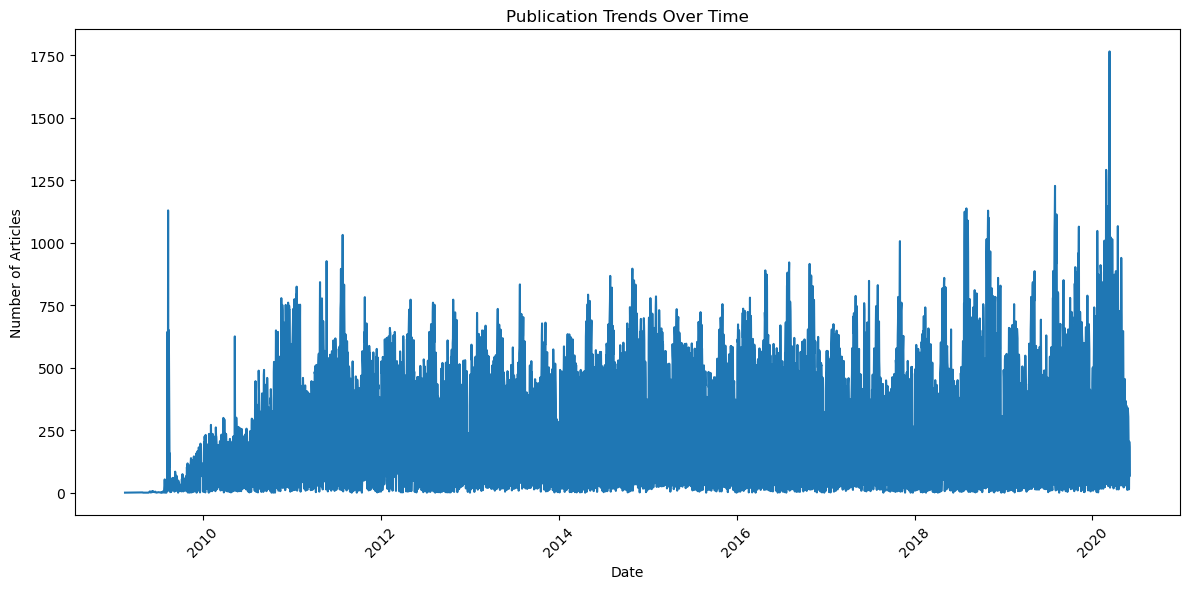

In [8]:
# Convert the dictionary to a DataFrame for easier plotting
publication_trends_df = pd.DataFrame(list(publication_trends.items()), columns=['Date', 'Article Count'])
publication_trends_df['Date'] = pd.to_datetime(publication_trends_df['Date'])

# Set the date column as the index
publication_trends_df.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=publication_trends_df, x=publication_trends_df.index, y='Article Count')
plt.title('Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The analysis of publication trends reveals a clear increase in the number of news articles starting from 2018, with a particularly significant surge from 2020 onwards. Initially, the data shows a stable and consistent volume of articles before 2018. However, beginning in 2018, there is a noticeable upward trend, indicating a rise in content production. The period from 2020 and beyond further accentuates this trend, with a marked acceleration in article frequency, potentially driven by increased news coverage and significant global events. This pattern highlights a shift in media dynamics, with a substantial growth in publication activity in recent years compared to the more constant rates observed previously.

## Text Analysis(Sentiment analysis & Topic Modeling):

In [5]:
# Perform sentiment analysis
eda.perform_sentiment_analysis()

# Get sentiment distribution
sentiment_distribution = eda.get_sentiment_distribution()
print("Sentiment Category Distribution:")
print(sentiment_distribution)

Sentiment Category Distribution:
sentiment_category
Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: count, dtype: int64


In [10]:
# Filter data for a specific stock (e.g., AAPL)
apple_data = eda.filter_stock_data('AAPL')
print("\nSentiment Category Distribution for AAPL:")
print(apple_data['sentiment_category'].value_counts())


Sentiment Category Distribution for AAPL:
sentiment_category
Neutral          298
Negative          74
Positive          43
Very Negative     26
Name: count, dtype: int64


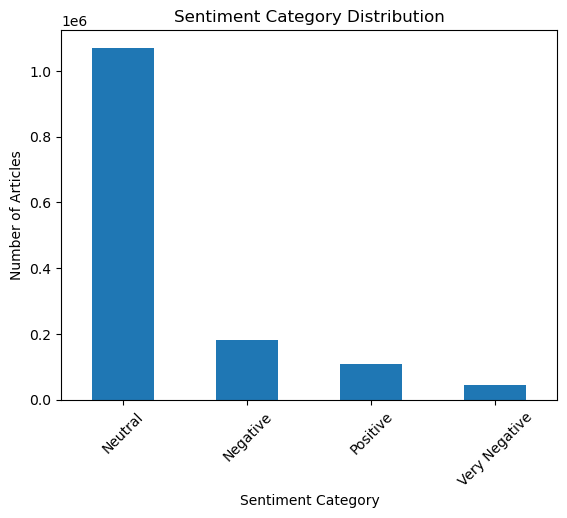

In [11]:
# Plot sentiment distribution to visualize my findings
sentiment_distribution.plot(kind='bar')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

The sentiment analysis of news headlines related to AAPL (Apple Inc.) reveals a diverse distribution of sentiments. The majority of headlines, totaling 298, are categorized as neutral, indicating that these reports are factual and devoid of strong emotional tone. There are 74 headlines with a negative sentiment, reflecting unfavorable or critical news about AAPL. Additionally, 43 headlines are classified as positive, highlighting favorable developments or achievements related to the company. Lastly, 26 headlines are categorized as very negative, signifying intense negative sentiments, possibly pointing to significant issues or crises affecting AAPL. This distribution provides a comprehensive view of how news about AAPL is perceived, indicating that while most coverage is neutral, there is a notable proportion of both positive and negative sentiment, with a smaller segment of extremely negative reports.

nlp analysis

In [3]:
from scripts.nlp_analysis import NLPAnalysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Initialize the NLPAnalysis class
nlp = NLPAnalysis(df)

In [12]:
# Add processed text column
nlp.add_processed_text()

In [13]:
# Extract and print top keywords
keywords = nlp.extract_keywords()
print("Top Keywords:")
for keyword, score in keywords:
    print(f"{keyword}: {score}")

Top Keywords:
stock: 179041.60902329205
share: 98932.89695136264
market: 85921.31818108013
report: 82617.1007120372
earnings: 77937.6158128852
top: 74148.98522348175
update: 72502.70127354177
eps: 71970.41911735637
est: 61729.37251932183
sale: 57500.05087288316


The analysis of the top keywords within the dataset reveals that the news articles are predominantly focused on financial markets, with "stock," "share," and "market" being the most frequently mentioned terms, reflecting the core themes of market dynamics and equity performance. Other significant keywords such as "earnings," "EPS," and "report" indicate a strong emphasis on corporate financial reports and earnings updates, which are critical to market participants. The prominence of these terms suggests that the dataset is heavily centered on financial news, with frequent discussions around stock performance, market conditions, and financial reporting, making it a valuable resource for understanding market trends and investor sentiment.

In [14]:
# Perform topic modeling and print topics
print("\nTopics Identified by LDA:")
topics = nlp.perform_topic_modeling(num_topics=5)
for topic in topics:
    print(topic)


Topics Identified by LDA:
(0, '0.060*"v" + 0.051*"est" + 0.049*"eps" + 0.044*"report" + 0.044*"sale"')
(1, '0.058*"price" + 0.042*"pt" + 0.036*"buy" + 0.032*"raise" + 0.031*"target"')
(2, '0.032*"share" + 0.020*"trading" + 0.019*"company" + 0.012*"update" + 0.011*"oil"')
(3, '0.031*"stock" + 0.026*"market" + 0.026*"retail" + 0.020*"tech" + 0.019*"financials"')
(4, '0.062*"etf" + 0.043*"benzinga" + 0.043*"stock" + 0.030*"top" + 0.024*"sector"')
